# Load the data

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,id,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,...,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
0,77130752.0,13011,18.0,4177.0,0,3664,11,2016,10,14,...,420.0,76.0,85.0,91.0,104.0,120.0,366.0,73.0,1050.0,1050.0
1,77126682.0,13011,28.0,6054.0,1,3244,10,2015,8,21,...,158.0,98.0,104.5,109.0,119.0,139.0,360.0,73.0,1050.0,1050.0
2,9816130.0,13011,8.0,1753.0,0,3086,9,2015,3,16,...,1050.0,102.0,111.0,117.0,126.0,140.5,386.0,73.0,1050.0,1050.0
3,1641895.0,13011,12.0,3194.0,0,2036,8,2012,4,30,...,73.0,137.0,146.0,145.0,161.0,157.0,291.0,73.0,682.0,682.0
4,1523930.0,13011,4.0,922.0,0,1963,7,2012,2,17,...,338.0,137.0,149.0,147.0,161.0,159.0,327.0,136.0,682.0,682.0


In [3]:
df.shape

(27755, 31)

In [4]:
# only eps
df = df[df['record_type_ep'] == 1]

# only albums
# df = df[df['record_type_album'] == 1]

In [5]:
df = df.sort_values(['release_year', 'release_month', 'release_day_of_month'])
df.head()

,id,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,...,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
5733,8318748.0,14068,6.0,1971.0,0,7670,36,2012,1,1,...,175.0,140.0,153.0,151.0,161.0,140.0,219.0,25.0,461.0,461.0
12311,4136331.0,100808,4.0,1439.0,0,6894,7,2012,1,1,...,453.0,140.0,153.0,151.0,161.0,140.0,1149.0,288.0,549.0,549.0
13881,8816479.0,13569,6.0,1625.0,0,2488,11,2012,1,1,...,27.0,140.0,153.0,151.0,161.0,140.0,249.0,14.0,963.0,963.0
13901,4551571.0,13675,5.0,1387.0,0,1012,9,2012,1,1,...,3.0,140.0,153.0,151.0,161.0,140.0,126.0,3.0,647.0,647.0
6610,1375219.0,102500,4.0,1830.0,0,1834,23,2012,1,9,...,26.0,139.0,152.0,149.0,161.0,140.0,83.0,3.0,329.0,329.0


In [6]:
df = df.drop([
    u'average_days_to_release_in_last_2_years',
    u'average_days_to_release_in_last_3_years',
    u'average_days_to_release_in_last_5_years',
#     u'average_days_to_release_in_last_2_years_for_release_type',
#     u'average_days_to_release_in_last_3_years_for_release_type',
#     u'average_days_to_release_in_last_5_years_for_release_type',
], axis=1)

In [7]:
df[df['release_year'] >= 2017].shape

(50, 28)

In [8]:
df = df[df['release_year'] >= 2017]

In [9]:
y = df['days_until_next_album']
X = df.drop(['days_until_next_album', 'id'], axis=1)
y.shape, X.shape

((50,), (50, 26))

In [10]:
X.head()

,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,...,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
13004,4208,4.0,1572.0,0,4689,40,2017,1,1,6,...,0,0,0,79.0,69.0,75.0,120.0,3.0,840.0,840.0
13006,4208,4.0,1662.0,0,4689,40,2017,1,1,6,...,0,0,0,79.0,69.0,75.0,120.0,3.0,840.0,840.0
10159,3448,4.0,1546.0,0,6573,16,2017,2,24,4,...,0,0,0,3.0,69.0,67.0,438.0,3.0,2722.0,2722.0
1974,13787,4.0,1443.0,0,6268,7,2017,3,10,4,...,0,0,0,532.0,69.0,67.0,1045.0,104.0,532.0,532.0
27017,12999,4.0,1136.0,0,5302,47,2017,3,13,0,...,0,0,0,9.0,69.0,68.5,115.0,4.0,504.0,504.0


In [11]:
columns = X.columns
columns

Index([u'artist_id', u'nb_tracks', u'duration', u'explicit_lyrics',
       u'days_since_first_release', u'total_albums_released', u'release_year',
       u'release_month', u'release_day_of_month', u'release_day_of_week',
       u'record_type_album', u'record_type_single', u'record_type_ep',
       u'albums_released_in_30_days', u'albums_released_in_30_60_days',
       u'albums_released_in_60_90_days', u'albums_released_in_90_180_days',
       u'albums_released_in_180_360_days', u'albums_released_in_360_720_days',
       u'days_since_previous_release', u'average_days_to_release_in_last_year',
       u'average_days_to_release_in_last_year_for_release_type',
       u'average_days_to_release', u'min_release_frequency',
       u'max_release_frequency',
       u'average_release_frequency_for_release_type'],
      dtype='object')

In [12]:
y.head()

13004     61.0
13006     61.0
10159     73.0
1974     413.0
27017     95.0
Name: days_until_next_album, dtype: float64

# Train/Test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 26), (5, 26), (45,), (5,))

In [15]:
# X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
# X_cv.shape, X_test.shape, y_cv.shape, y_test.shape

In [16]:
X_train.head()

,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,...,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
13004,4208,4.0,1572.0,0,4689,40,2017,1,1,6,...,0,0,0,79.0,69.0,75.0,120.0,3.0,840.0,840.0
13006,4208,4.0,1662.0,0,4689,40,2017,1,1,6,...,0,0,0,79.0,69.0,75.0,120.0,3.0,840.0,840.0
10159,3448,4.0,1546.0,0,6573,16,2017,2,24,4,...,0,0,0,3.0,69.0,67.0,438.0,3.0,2722.0,2722.0
1974,13787,4.0,1443.0,0,6268,7,2017,3,10,4,...,0,0,0,532.0,69.0,67.0,1045.0,104.0,532.0,532.0
27017,12999,4.0,1136.0,0,5302,47,2017,3,13,0,...,0,0,0,9.0,69.0,68.5,115.0,4.0,504.0,504.0


In [17]:
# X_cv.head()

In [18]:
X_test.head()

,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,...,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
7794,1090,5.0,1865.0,0,5667,72,2018,7,27,4,...,0,0,0,133.0,43.0,51.0,80.0,1.0,623.0,623.0
2522,4065,4.0,1355.0,0,7333,35,2018,8,31,4,...,0,0,0,63.0,42.0,72.5,216.0,13.0,1275.0,1275.0
11547,13086,5.0,1181.0,0,4997,26,2018,9,26,2,...,0,0,0,156.0,42.0,51.0,200.0,15.0,1015.0,1015.0
16740,3657,5.0,1238.0,0,13899,14,2018,11,23,4,...,0,0,0,1276.0,37.0,46.0,1069.0,203.0,1414.0,1414.0
6926,13058,4.0,1530.0,0,9655,16,2018,12,5,2,...,0,0,0,128.0,36.0,51.0,644.0,29.0,2631.0,2631.0


# Baseline (Dummy Regressor)

In [19]:
from sklearn.dummy import DummyRegressor

In [20]:
model = DummyRegressor(strategy='median')
model.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='median')

In [21]:
model.score(X_train, y_train)

-0.1286200799045687

In [22]:
model.score(X_test, y_test)

-1.2509139807538765

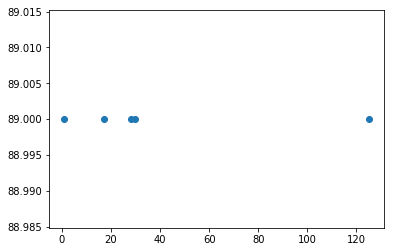

In [23]:
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred)

In [24]:
mean_absolute_error(y_test, y_test_pred)

63.2

In [25]:
model = DummyRegressor(strategy='mean')
model.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [26]:
model.score(X_train, y_train)

0.0

In [27]:
model.score(X_test, y_test)

-5.0493303181177005

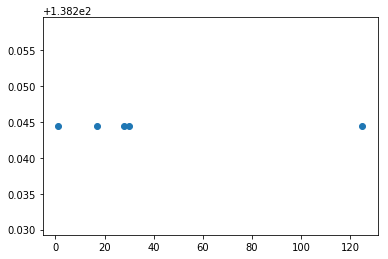

In [28]:
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred)

In [29]:
mean_absolute_error(y_test, y_test_pred)

98.04444444444444

# Feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
X_train = scaler.transform(X_train)
# X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
X_train.shape

(45, 26)

# PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(
    n_components=0.99,
    svd_solver='full',
    random_state=1000
)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=1000,
  svd_solver='full', tol=0.0, whiten=False)

In [36]:
# X_train = pca.transform(X_train)
# # X_cv = pca.transform(X_cv)
# X_test = pca.transform(X_test)

In [37]:
X_train.shape

(45, 26)

# Feature selection

In [38]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [39]:
estimator = RandomForestRegressor(random_state=1000, n_jobs=-1)
selector = RFE(estimator, 10, step=1)
selector = selector.fit(X_train, y_train)

/usr/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
selector.support_

array([ True, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True])

In [41]:
# X_train = selector.transform(X_train)
# # X_cv = selector.transform(X_cv)
# X_test = selector.transform(X_test)

In [42]:
X_train.shape

(45, 26)

# Linear regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linear_model = LinearRegression(
    n_jobs=-1
)
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [45]:
linear_model.score(X_train, y_train)

0.5280291383872533

In [46]:
linear_model.score(X_test, y_test)

-18.886539833082523

In [47]:
for i, x in enumerate(linear_model.coef_):
    if x > 10 or x < -10:
        print(columns[i], float(x))

('nb_tracks', -44.84894136216539)
('duration', 47.24485833034117)
('days_since_first_release', 12.037538829397787)
('total_albums_released', -105.44377481106609)
('release_year', 125.84227959417818)
('release_month', 108.55596573405167)
('release_day_of_month', -31.14031569093134)
('release_day_of_week', -16.95749888157091)
('days_since_previous_release', -15.509107173875035)
('average_days_to_release_in_last_year', 95.97399860152497)
('average_days_to_release_in_last_year_for_release_type', -29.92061796580185)
('min_release_frequency', 12.04030883878508)
('max_release_frequency', -16.345106585240018)
('average_release_frequency_for_release_type', -16.34510658524021)


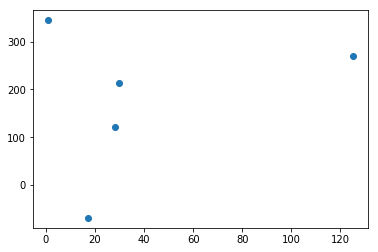

In [48]:
linear_y_test_pred = linear_model.predict(X_test)
plt.scatter(y_test, linear_y_test_pred)

In [49]:
mean_absolute_error(y_test, linear_y_test_pred)

170.4197112686615

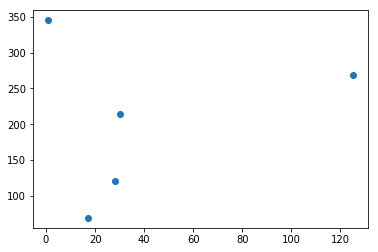

In [50]:
plt.scatter(y_test, np.abs(linear_y_test_pred))

In [51]:
mean_absolute_error(y_test, np.abs(linear_y_test_pred))

163.61971126866152

# KNN regression

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [95]:
n_neighbors = [1, 2, 3, 4, 5, 10]
param_grid = {
    'n_neighbors': n_neighbors,
}

cv = TimeSeriesSplit(n_splits=3)
cv = TimeSeriesSplit(n_splits=3).split(X_train)

hyperparameters_search = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
hyperparameters_search.best_params_

# model = KNeighborsRegressor(
#     n_jobs=-1
# )
# model.fit(X_train, y_train)

{'n_neighbors': 5}

In [96]:
hyperparameters_search.best_score_

-0.025456417927214658

In [97]:
model = hyperparameters_search.best_estimator_
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [98]:
model.score(X_train, y_train)

0.4384906954362787

In [99]:
model.score(X_test, y_test)

-3.948232970542506

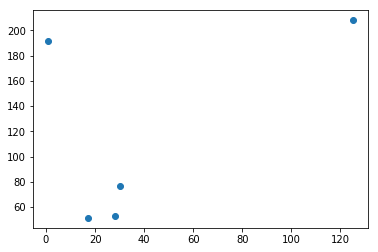

In [100]:
knn_y_test_pred = model.predict(X_test)
plt.scatter(y_test, knn_y_test_pred)

In [101]:
mean_absolute_error(y_test, knn_y_test_pred)

75.8

In [102]:
mean_absolute_error(y_test, np.abs(knn_y_test_pred))

75.8

# SVR

In [103]:
from sklearn.svm import SVR

In [104]:
max_iters = [100, 1000, 5000, 10000, 20000, 50000, 100000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {
    'max_iter': max_iters,
#     'kernel': kernels,
    'C': Cs,
    'gamma': gammas,
}

cv = TimeSeriesSplit(n_splits=3).split(X_train)
# my_cv = TimeSeriesSplit(n_splits=2)

hyperparameters_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
# hyperparameters_search.best_params_

GridSearchCV(cv=<generator object split at 0x1140c8f00>,
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 5000, 10000, 20000, 50000, 100000], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
hyperparameters_search.best_score_

-0.11120648977804241

In [106]:
model = hyperparameters_search.best_estimator_
model

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=100, shrinking=True, tol=0.001, verbose=False)

In [107]:
model.score(X_train, y_train)

0.8446201373932453

In [108]:
# model.score(X_cv, y_cv)

In [109]:
model.score(X_test, y_test)

-2.6779343830695055

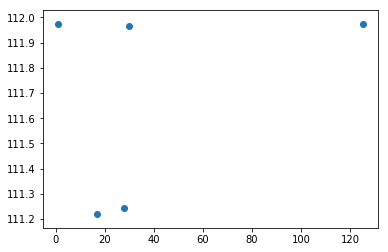

In [110]:
svr_y_test_pred = model.predict(X_test)
plt.scatter(y_test, svr_y_test_pred)

In [111]:
mean_absolute_error(y_test, svr_y_test_pred)

76.68495103807425

In [112]:
mean_absolute_error(y_test, np.abs(svr_y_test_pred))

76.68495103807425

# SVR

In [113]:
from sklearn.svm import SVR

In [114]:
max_iters = [100, 1000, 5000, 10000, 20000, 50000, 100000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {
    'max_iter': max_iters,
    'kernel': ['poly'],
    'degree': [2, 3, 4],
    'C': Cs,
    'gamma': gammas,
}

cv = TimeSeriesSplit(n_splits=3).split(X_train)
# my_cv = TimeSeriesSplit(n_splits=2)

hyperparameters_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
# hyperparameters_search.best_params_

GridSearchCV(cv=<generator object split at 0x114559f00>,
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 5000, 10000, 20000, 50000, 100000], 'gamma': [0.001, 0.01, 0.1, 1], 'degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [115]:
hyperparameters_search.best_score_

-0.07514288903295596

In [116]:
model = hyperparameters_search.best_estimator_
model

SVR(C=10, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=0.1,
  kernel='poly', max_iter=100, shrinking=True, tol=0.001, verbose=False)

In [117]:
model.score(X_train, y_train)

0.24757103571246872

In [118]:
# model.score(X_cv, y_cv)

In [119]:
model.score(X_test, y_test)

-0.937763669484713

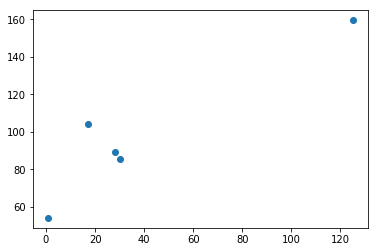

In [120]:
svr_y_test_pred = model.predict(X_test)
plt.scatter(y_test, svr_y_test_pred)

In [121]:
mean_absolute_error(y_test, svr_y_test_pred)

58.328525593930806

In [122]:
mean_absolute_error(y_test, np.abs(svr_y_test_pred))

58.328525593930806

# SVR

In [123]:
from sklearn.svm import SVR

In [124]:
max_iters = [100, 1000, 5000, 10000, 20000, 50000, 100000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {
    'max_iter': max_iters,
    'kernel': ['linear'],
    'C': Cs,
    'gamma': gammas,
}

cv = TimeSeriesSplit(n_splits=3).split(X_train)
# my_cv = TimeSeriesSplit(n_splits=2)

hyperparameters_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
# hyperparameters_search.best_params_

GridSearchCV(cv=<generator object split at 0x114591910>,
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 5000, 10000, 20000, 50000, 100000], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
hyperparameters_search.best_score_

-0.1810626793023154

In [126]:
model = hyperparameters_search.best_estimator_
model

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='linear', max_iter=100, shrinking=True, tol=0.001, verbose=False)

In [127]:
for i, x in enumerate(model.coef_[0]):
    if x > 2 or x < -2:
        print(columns[i], x)

('artist_id', -6.596816823025608)
('total_albums_released', -12.883976332514917)
('release_year', -2.089072554491833)
('release_month', 2.315553215885787)
('release_day_of_month', -2.5629920587111914)
('days_since_previous_release', -7.388246760305524)
('average_days_to_release_in_last_year_for_release_type', -5.588116968707034)
('average_days_to_release', 9.866957386100715)
('min_release_frequency', 7.6243085426175154)
('max_release_frequency', -4.9882499915992575)
('average_release_frequency_for_release_type', -4.9882499915992575)


In [128]:
model.score(X_train, y_train)

0.019388314428360313

In [129]:
# model.score(X_cv, y_cv)

In [130]:
model.score(X_test, y_test)

-0.4769931208290339

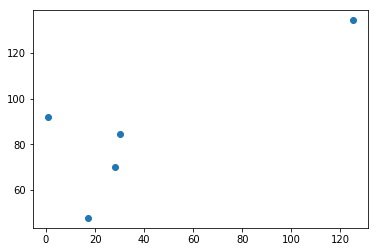

In [131]:
svr_y_test_pred = model.predict(X_test)
plt.scatter(y_test, svr_y_test_pred)

In [132]:
mean_absolute_error(y_test, svr_y_test_pred)

45.538279157671056

In [133]:
mean_absolute_error(y_test, np.abs(svr_y_test_pred))

45.538279157671056

# SVR

In [134]:
from sklearn.svm import SVR

In [135]:
max_iters = [100, 1000, 5000, 10000, 20000, 50000, 100000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {
    'max_iter': max_iters,
    'kernel': ['sigmoid'],
    'C': Cs,
    'gamma': gammas,
}

cv = TimeSeriesSplit(n_splits=3).split(X_train)
# my_cv = TimeSeriesSplit(n_splits=2)

hyperparameters_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
# hyperparameters_search.best_params_

GridSearchCV(cv=<generator object split at 0x114586280>,
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 5000, 10000, 20000, 50000, 100000], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [136]:
hyperparameters_search.best_score_

-0.041603813820060766

In [137]:
model = hyperparameters_search.best_estimator_
model

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='sigmoid', max_iter=100, shrinking=True, tol=0.001, verbose=False)

In [138]:
model.score(X_train, y_train)

-0.20337414026899014

In [139]:
# model.score(X_cv, y_cv)

In [140]:
model.score(X_test, y_test)

0.5546741989726929

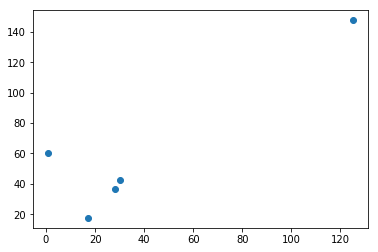

In [141]:
svr_y_test_pred = model.predict(X_test)
plt.scatter(y_test, svr_y_test_pred)

In [142]:
mean_absolute_error(y_test, svr_y_test_pred)

20.790760117466334

In [143]:
mean_absolute_error(y_test, np.abs(svr_y_test_pred))

20.790760117466334

# Ensembling

In [144]:
# preds = [linear_y_cv_pred, knn_y_cv_pred, svr_y_cv_pred]

In [145]:
# average_preds = np.abs(linear_y_cv_pred + knn_y_cv_pred + svr_y_cv_pred / len(preds)) - 50

In [94]:
# mean_absolute_error(y_cv, average_preds)

# Random Forest model

In [74]:
# from sklearn.ensemble import RandomForestRegressor

In [75]:
# # model = RandomForestRegressor(
# #     n_estimators=100,
# #     max_depth=50,
# # #     max_features=5,
# # #     min_samples_leaf=1,
# # #     criterion='mse',
# #     random_state=0, n_jobs=-1
# # )
# # model.fit(X_train, y_train)

# n_estimators = [10, 20, 50, 100, 200]
# max_depth = [None, 1, 2, 3, 5, 7, 10, 15]
# max_features = [None, 1, 2, 3, 5, 7, 10, 15, 'auto']
# min_samples_leaf = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
# param_grid = {
#     'n_estimators': n_estimators,
#     'max_depth': max_depth,
#     'max_features': max_features,
#     'min_samples_leaf': min_samples_leaf,
# }

# cv = TimeSeriesSplit(n_splits=7)

# hyperparameters_search = RandomizedSearchCV(
#     RandomForestRegressor(random_state=0),
#     param_grid,
#     cv=cv,
#     n_jobs=-1
# )
# hyperparameters_search.fit(X_train, y_train)
# hyperparameters_search.best_params_

In [76]:
# hyperparameters_search.best_score_

In [77]:
# model = hyperparameters_search.best_estimator_
# model

In [78]:
# model.score(X_train, y_train)

In [79]:
# model.score(X_test, y_test)

In [80]:
# model.feature_importances_

In [81]:
# y_test_pred = model.predict(X_test)
# plt.scatter(y_test, y_test_pred)

In [82]:
# mean_absolute_error(y_test, y_test_pred)

In [83]:
# mean_absolute_error(y_test, np.abs(y_test_pred))

# SGDRegressor

In [84]:
# from sklearn.linear_model import SGDRegressor

In [85]:
# model = SGDRegressor(max_iter=1000, tol=1e-3)
# model.fit(X_train, y_train)

In [86]:
# model.score(X_train, y_train)

In [87]:
# model.score(X_test, y_test)

In [88]:
# model.predict(X_train)

In [89]:
# y_train[0]

In [90]:
# y_test_pred = model.predict(X_test)
# plt.scatter(y_test, y_test_pred)

In [91]:
# mean_absolute_error(y_test, y_test_pred)

In [92]:
# mean_absolute_error(y_test, np.abs(y_test_pred))

# XGBoost

In [93]:
# !pip install xgboost

In [94]:
# from xgboost import XGBRegressor

In [95]:
# model = XGBRegressor(
#     max_depth=2,
# #     subsample=0.9,
# #     colsample_bytree=0.9,
# #     colsample_bylevel=0.9,
# #     min_child_weight=1,
#     random_state=0, n_jobs=-1
# )
# model.fit(X_train, y_train)

In [96]:
# model.score(X_train, y_train)

In [97]:
# model.score(X_test, y_test)

In [98]:
# y_test_pred = model.predict(X_test)
# plt.scatter(y_test, y_test_pred)

In [99]:
# mean_absolute_error(y_test, y_test_pred)

In [100]:
# mean_absolute_error(y_test, np.abs(y_test_pred))

# Catboost

In [101]:
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [102]:
# from catboost import CatBoostRegressor

In [103]:
# model = CatBoostRegressor(
# #     iterations=700,
# #     learning_rate=0.02,
# #     depth=12,
# #     eval_metric='RMSE',
# #     random_seed = 23,
# #     bagging_temperature = 0.2,
# #     od_type='Iter',
# #     metric_period = 75,
# #     od_wait=100
# )

In [104]:
# model.fit(X_train, y_train,
# #              eval_set=(X_test,y_valid),
# #              cat_features=categorical_features_pos,
# #              use_best_model=True,
# #              verbose=True
#          )

In [105]:
# model.score(X_train, y_train)

In [106]:
# model.score(X_test, y_test)

In [107]:
# y_test_pred = model.predict(X_test)
# plt.scatter(y_test, y_test_pred)

In [108]:
# mean_absolute_error(y_test, y_test_pred)

In [109]:
# mean_absolute_error(y_test, np.abs(y_test_pred))

# MLPRegressor

In [110]:
from sklearn.neural_network import MLPRegressor

In [111]:
model = MLPRegressor(
    hidden_layer_sizes=(100,),
    max_iter=200,
    alpha=0.1,
    warm_start=True,
    random_state=0,
)
model.fit(X_train, y_train)

/usr/local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=True)

In [112]:
model.score(X_train, y_train)

0.15887332627223816

In [113]:
model.score(X_test, y_test)

-0.4137535888424113

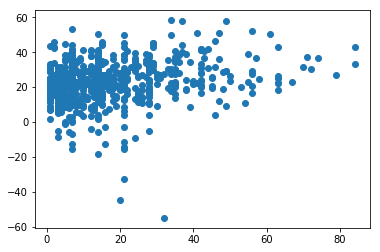

In [114]:
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred)

In [115]:
mean_absolute_error(y_test, y_test_pred)

14.414192047440622

In [116]:
mean_absolute_error(y_test, np.abs(y_test_pred))

13.82209371673733

# Keras

In [117]:
# !pip install keras